In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Setup Complete


# Data loading and analysys

In [2]:
df = pd.read_csv("Cancer_Data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

target = 'diagnosis':

M -> Malignant, B -> Benign

In [5]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Preprocessing

In [8]:
X = df.copy()
y = X.pop('diagnosis')  # target
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Encoding the target
labelencoder = LabelEncoder()
y_encode = labelencoder.fit_transform(y)
y_encode = pd.Series(y_encode, name='diagnosis_encoded')
y_encode

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_encoded, Length: 569, dtype: int64

<Axes: >

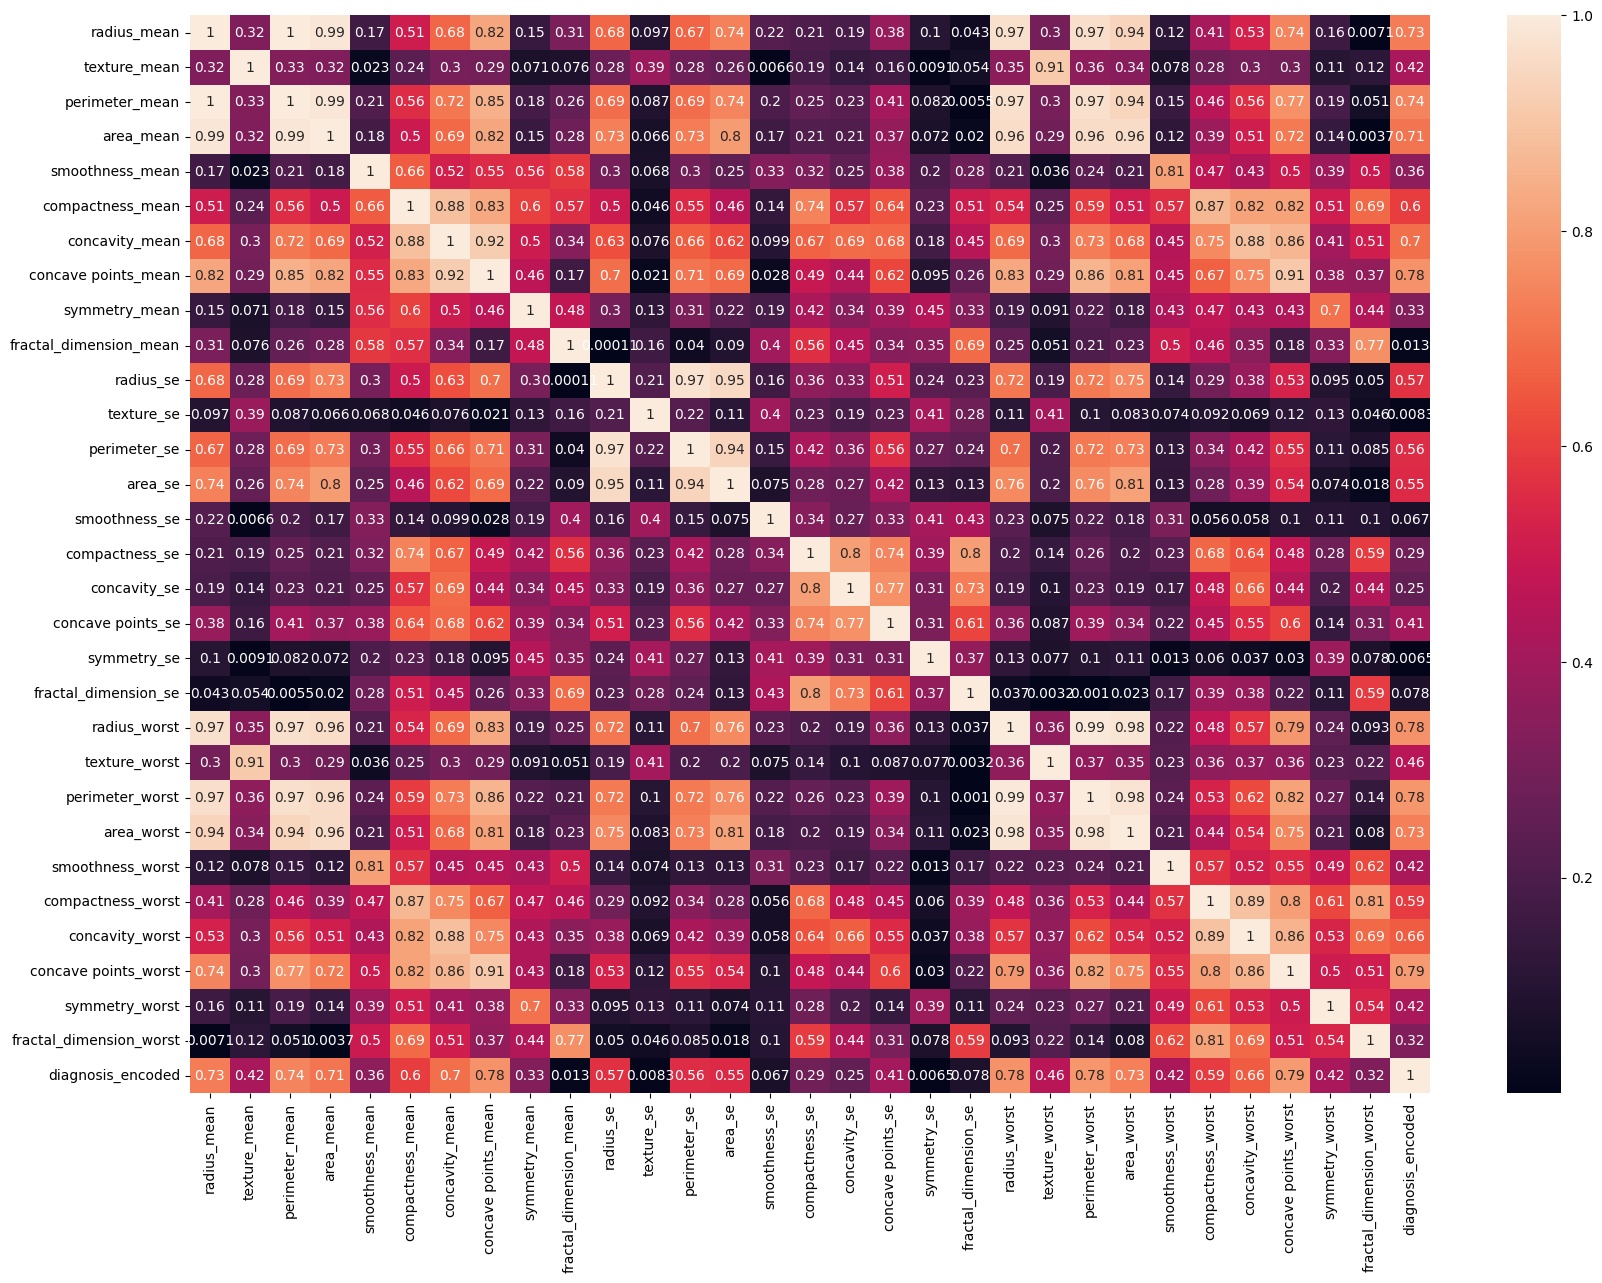

In [10]:
# Correlation matrix
corr_matrix = X.join(y_encode).corr().abs()
plt.figure(figsize=[20, 14])
sns.heatmap(corr_matrix, annot=True)

In [11]:
# Mutual information scores
def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [12]:
# Compare feature-target relations using correlation matrix an MI scores
mi_scores = make_mi_scores(X, y_encode)
print(f'MI SCORES (diagnosis):\n{mi_scores}\n')
print('CORRELATION MATRIX (diagnosis):')
print(corr_matrix['diagnosis_encoded'].sort_values(ascending=False).drop('diagnosis_encoded'))

MI SCORES (diagnosis):
perimeter_worst            0.473387
area_worst                 0.463288
radius_worst               0.454272
concave points_mean        0.437704
concave points_worst       0.436119
perimeter_mean             0.402936
concavity_mean             0.375148
radius_mean                0.361199
area_mean                  0.359468
area_se                    0.337170
concavity_worst            0.315259
perimeter_se               0.274658
radius_se                  0.245417
compactness_worst          0.226367
compactness_mean           0.216178
concave points_se          0.128491
texture_worst              0.118904
concavity_se               0.109279
smoothness_worst           0.100109
texture_mean               0.094937
symmetry_worst             0.089993
smoothness_mean            0.077111
compactness_se             0.075095
symmetry_mean              0.069241
fractal_dimension_worst    0.061798
fractal_dimension_se       0.035662
smoothness_se              0.018691
symme

In [13]:
# Scoring processed datasets using Cross Validation
def score_dataset(X, y, model=XGBClassifier()):
    score = cross_val_score(
        model, X, y, cv=5, scoring='accuracy',
    )
    score = score.mean()
    return score

In [14]:
score_dataset(X, y_encode)

0.9701288619779538

# Drop uninformative columns

In [15]:
X_informative = X.loc[:, mi_scores > 0.01]
score_dataset(X_informative, y_encode)

0.9789163173420276

(Dropping uninformative columns yields better results than the original dataset)

# K-Means clustering

In [16]:
# Create cluster labels
def cluster_labels(df, features, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
    X_new = pd.DataFrame()
    X_new["Cluster"] = kmeans.fit_predict(X_scaled)
    return X_new

In [17]:
# Adding 'Cluster' feature vs model performance
X_with_clusters = X.join(cluster_labels(X, X_informative.columns))
score_dataset(X_with_clusters, y_encode)

0.9754075454122031

(Clustering yields worse results than deleting uninformative features)

# PCA

In [18]:
# Apply Principal Compoent Analysis
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=component_names,
        index=X.columns,
    )
    return pca, X_pca, loadings

In [19]:
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                              PC1       PC2       PC3       PC4       PC5  \
radius_mean              0.218902 -0.233857 -0.008531  0.041409  0.037786   
texture_mean             0.103725 -0.059706  0.064550 -0.603050 -0.049469   
perimeter_mean           0.227537 -0.215181 -0.009314  0.041983  0.037375   
area_mean                0.220995 -0.231077  0.028700  0.053434  0.010331   
smoothness_mean          0.142590  0.186113 -0.104292  0.159383 -0.365089   
compactness_mean         0.239285  0.151892 -0.074092  0.031795  0.011704   
concavity_mean           0.258400  0.060165  0.002734  0.019123  0.086375   
concave points_mean      0.260854 -0.034768 -0.025564  0.065336 -0.043861   
symmetry_mean            0.138167  0.190349 -0.040240  0.067125 -0.305941   
fractal_dimension_mean   0.064363  0.366575 -0.022574  0.048587 -0.044424   
radius_se                0.205979 -0.105552  0.268481  0.097941 -0.154456   
texture_se               0.017428  0.089980  0.374634 -0.359856 -0.191651   

In [20]:
PCA_mi_scores = make_mi_scores(X_pca, y_encode)
PCA_mi_scores

PC1     0.443977
PC2     0.086674
PC28    0.079504
PC24    0.063131
PC13    0.056666
PC3     0.053770
PC17    0.053215
PC25    0.050944
PC26    0.047072
PC21    0.041656
PC29    0.038167
PC20    0.037676
PC22    0.037612
PC27    0.037185
PC11    0.032835
PC30    0.032462
PC19    0.025765
PC7     0.023060
PC15    0.016774
PC8     0.015090
PC18    0.014625
PC4     0.014002
PC12    0.012225
PC16    0.012169
PC23    0.010206
PC6     0.008982
PC14    0.005008
PC10    0.000000
PC9     0.000000
PC5     0.000000
Name: MI Scores, dtype: float64

In [21]:
X_with_PC = X.join(X_pca.loc[:, PCA_mi_scores > 0.1])
score_dataset(X_with_PC, y_encode)

0.9789007918025152

(PCA yields results similar to deleting uninformative features)

# MODEL SELECTION

We are going to try 4different models: Logistic regression, KNN, SVM and XGBClassifier.

In [22]:
X_prep = X_with_PC.copy()  # Adding PC performs better in most models than deleting features

# Normalizing features (min-max)
X_normalized = (X_prep - X_prep.min()) / (X_prep.max() - X_prep.min())
X_normalized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,PC1
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.674370
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.363425
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.516319
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.579790
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.434135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0.548552
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0.427651
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0.311717
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0.728378


In [23]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encode, test_size=0.2, random_state=0)

# Logistic regression

In [24]:
# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Score model
best_model = grid.best_estimator_
best_params = grid.best_params_
print(f'Logistic regression best parameters: {best_params}')

Logistic regression best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [25]:
y_pred = best_model.predict(X_test)
print(f'Logistic regression test prediction accuracy: {accuracy_score(y_test, y_pred)}')

Logistic regression test prediction accuracy: 0.9649122807017544


# KNN

In [26]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [1, 2, 3, 5, 10, 20], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Score model
best_model = grid.best_estimator_
best_params = grid.best_params_
print(f'KNN best parameters: {best_params}')

KNN best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [27]:
y_pred = best_model.predict(X_test)
print(f'KNN test prediction accuracy: {accuracy_score(y_test, y_pred)}')

KNN test prediction accuracy: 0.956140350877193


(KNN performs slightly worse than Logistic regression)

# SVC

In [39]:
# Hyperparameter tuning
param_grid = {'C': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3]}
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Score model
best_model = grid.best_estimator_
best_params = grid.best_params_
print(f'SVC best parameters: {best_params}')

SVC best parameters: {'C': 1.0, 'degree': 2, 'kernel': 'rbf'}


In [40]:
y_pred = best_model.predict(X_test)
print(f'SVC test prediction accuracy: {accuracy_score(y_test, y_pred)}')

SVC test prediction accuracy: 0.9736842105263158


(SVC performs better than Linear regression)

# XGBClassifier

In [30]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train, 
         early_stopping_rounds=5,
         eval_set=[(X_test, y_test)],
         verbose=False)

# Score model
best_model = grid.best_estimator_
best_params = grid.best_params_
print(f'XGBClassifier best parameters: {best_params}')

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

XGBClassifier best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


(XGBClassifier best params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8})

In [37]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f'XGBClassifier prediction accuracy: {accuracy_score(y_test, y_pred)}')

XGBClassifier prediction accuracy: 0.9649122807017544


(XGBClassifier performs worse than SVC)

# Final model

In [41]:
model = SVC(C=1.0, degree=2, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model test prediction accuracy: {accuracy_score(y_test, y_pred)}')

Model test prediction accuracy: 0.9736842105263158
